In [305]:
import tensorflow as tf
import gym

https://www.biorxiv.org/content/early/2018/04/06/295964

> Meta-RL explains these shifts as an emergent effect, arising from a very general set of
conditions. Moreover, dynamic learning rates constitute just one possible form of specialization. When meta-RL occurs in environments with different structures, qualitatively different learning rules will emerge, a point that will be illustrated by subsequent simulations.

Cool. So what does emerge in different conditions. want to study that!!
what is necessary/sufficient for various 'skills' to emerge?


Main questions;

- how does the pfc's meta-model actually get trained? how is the rpe actually used!?
- how are actions actually generated? How are the actions chosen while the pfc it developing/learning?!?
- but this doesnt really work... the number of iterations required is nothing close to what animals achieve!?
- so the only proof that the pfc model has learn a model-bsaed algol is the two-step task!?
- DA signaling is influenced by projections from PFC. Huh!?


The important part(s) seem to be;
- a model-free algol giving rise to a model-based algol.
- 

Future work;
- what if we learned a small model-free predictor of the reward then used it to train the pfc? like world models, except ???
- ?

Want: online learning of a meta learner!

Why does the PFC behave like this? 
- It is competing with DA?
- It is attempting to help the DA/reduce calls to a more expensive (in some sense) oracle?
- ?

In [277]:
batch_size = 50

In [306]:
reward = tf.placeholder(shape=[None, 1], dtype=tf.float32)
observation = tf.placeholder(shape=[None, 28*28], dtype=tf.float32)

In [308]:
"""
Template code for making nns.
"""

def rnn(seq, hidden_size=32):
    lstm = tf.contrib.rnn.BasicLSTMCell(hidden_size)
    hidden_state = tf.zeros([batch_size, hidden_size])
    current_state = tf.zeros([batch_size, hidden_size])
    state = hidden_state, current_state
    output, state = lstm(seq, state)
    return output

def mlp(x, hidden_size=32):
    y = tf.layers.dense(x, hidden_size)
    y = tf.nn.relu(y)
    return tf.layers.dense(y, hidden_size)

In [301]:
def da(o, r):  # is that it!?
    p = mlp(o)  # predicted reward
    rpe = r-p
    return p, rpe

def pfc(o, a, r):
    h = rnn(tf.concat([o, a, r], axis=1), 32)
    y = tf.layers.dense(h, 2)
    return y[:, 0], y[:, 1]

In [ ]:
responsible_weight = tf.slice(weights,action_holder,[1])
loss = -(tf.log(responsible_weight)*reward_holder)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

What about other meta learning or meta-RL techniques?!

- https://arxiv.org/abs/1802.07245
- https://arxiv.org/abs/1611.02779

Could imagine a meta learner that recieves an embedded loss fn and returns an optimiser.

```python
h = embed(loss_fn)
opt = generator(h, task)
nn = opt(task, nn)  # returns trained nn
```
words

```python
# train the generator
for loss in loss_fns:
    h = embed(loss)
    
    
```

Simple -> Complex!?!?

In [309]:
def fn(n):
    return 1 - (1- 0.1)**(n+1)

In [310]:
import numpy as np
import matplotlib.pyplot as plt

/home/act65/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


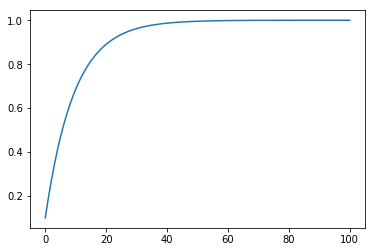

In [311]:
x = np.linspace(0, 100, 101)
plt.plot(fn(x))